In [1]:
import cv2
import numpy as np

from skimage import data, exposure
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def preprocess_img(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Normalize image
    min_bit = np.min(image)
    max_bit = np.max(image)
    image = cv2.normalize(image*16, dst=None, alpha=min_bit*16, beta=max_bit*16, norm_type=cv2.NORM_MINMAX)
    return image

def print_img(preprocessed_img, title="Image"):    
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.set_title(title)
    ax.imshow(preprocessed_img, cmap=plt.cm.gray)

# Src 500um - 88hr timelapse

In [2]:
# bf_path = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/Src_500um/BF/"
# tr_path = "R:/Users/Rahul/Documents/494/Data/88hr timelapse/Src_500um/Texas Red/"
bf_path = "C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/Src_500um/BF/"
tr_path = "C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/Src_500um/Texas Red/"

## Day 0 

In [3]:
sample_spheroid = bf_path + "scan_Plate_R_p00_0_B01f00d4.TIF"
sample_sensor = tr_path + "scan_Plate_R_p00_0_B01f00d3.TIF"

### Spheroid

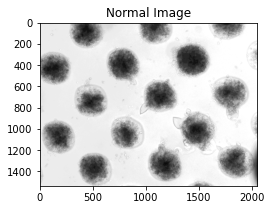

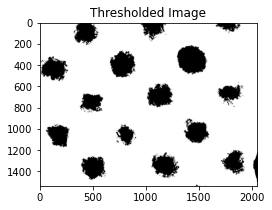

In [64]:
threshold = 120 # Can vary between images

img = sample_spheroid
img = preprocess_img(img)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

print_img(img, "Normal Image")
print_img(thresh, "Thresholded Image")

In [5]:
# Retrieval modes and contour approximation types found on OpenCV docs
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

radius_range = (40, 500) # Can vary between images 

contours = [] # New contour array that only has significant contours
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)    

circle_coords = []
for contour in contours:
    (x, y), r = cv2.minEnclosingCircle(contour)
    if r > radius_range[1]:
        continue
    circle_coords.append((x, y, r))

All units in um (0.638 pixels/um)

Circle #1:
 center (x,y): (811.128526645768, 2137.9310344827586)
 area: 71579.42896118399
Circle #2:
 center (x,y): (1810.344827586207, 2086.9905956112852)
 area: 103593.98918772332
Circle #3:
 center (x,y): (2857.83840645817, 2028.926263408601)
 area: 70837.65671484088
Circle #4:
 center (x,y): (1283.9627161295061, 1633.5154566271551)
 area: 57362.00648924061
Circle #5:
 center (x,y): (250.2492587768172, 1648.0483291291143)
 area: 82709.33273987647
Circle #6:
 center (x,y): (2300.4573236064853, 1590.7667393221002)
 area: 78620.77338513828
Circle #7:
 center (x,y): (739.0282131661442, 1131.3599015478055)
 area: 75282.0255985275
Circle #8:
 center (x,y): (1798.7705338337578, 1084.346950614714)
 area: 87645.87783047905
Circle #9:
 center (x,y): (2781.2245527404975, 1038.6269309303977)
 area: 68791.04543670597
Circle #10:
 center (x,y): (244.17219490840517, 687.2274942906299)
 area: 94146.65449928188
Circle #11:
 center (x,y): (1245.3702250991869, 595.61

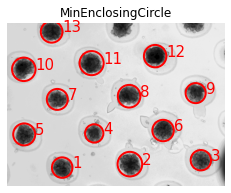

In [6]:
scale = 0.638 # pixels / um 

verbose = True

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("MinEnclosingCircle")
ax.imshow(img, cmap=plt.cm.gray)

print("All units in um ({} pixels/um)\n".format(scale))
for idx, circle in enumerate(circle_coords):
    x, y, r = circle[0], circle[1], circle[2]
    c = plt.Circle((x, y), r, color="red", linewidth=2, fill=False)
    
    if verbose:
        ax.text(x + r, y, str(idx+1), color='red', fontsize=15)
        
        x, y, r = x/scale, y/scale, r/scale
        print("Circle #{}:\n center (x,y): ({}, {})\n area: {}".format(idx+1,x,y,np.pi*r**2))
        
    ax.add_patch(c)
    
ax.set_axis_off()

### Sensor

All units in um (0.638 pixels/um)

Circle #1:
 center (x,y): (1304.0752351097178, 1730.4075235109717)
 area: 1883.2324292064786
Circle #2:
 center (x,y): (728.175961485477, 1056.1075718798982)
 area: 1788.5307684608515
Circle #3:
 center (x,y): (643.5896057320239, 148.47112673577095)
 area: 3736.4853829067433


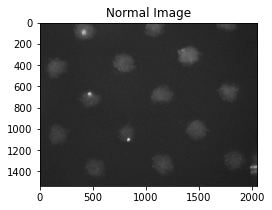

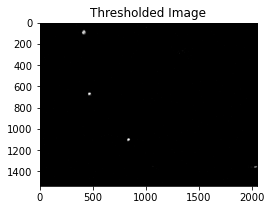

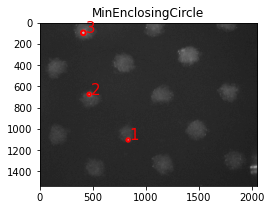

In [7]:
threshold = 150
radius_range = (10, 100)


img = sample_sensor
img = preprocess_img(img)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

print_img(img, "Normal Image")
print_img(thresh, "Thresholded Image")

# Retrieval modes and contour approximation types found on OpenCV docs
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

contours = [] # New contour array that only has significant contours
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)    

circle_coords = []
for contour in contours:
    (x, y), r = cv2.minEnclosingCircle(contour)
    if r > radius_range[1]:
        continue
    circle_coords.append((x, y, r))
    
verbose = True

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("MinEnclosingCircle")
ax.imshow(img, cmap=plt.cm.gray)

print("All units in um ({} pixels/um)\n".format(scale))
for idx, circle in enumerate(circle_coords):
    x, y, r = circle[0], circle[1], circle[2]
    c = plt.Circle((x, y), r, color="red", linewidth=2, fill=False)
    
    if verbose:
        ax.text(x + r, y, str(idx+1), color='red', fontsize=15)
        
        scale = 0.638
        x, y, r = x/scale, y/scale, r/scale
        print("Circle #{}:\n center (x,y): ({}, {})\n area: {}".format(idx+1,x,y,np.pi*r**2))
        
    ax.add_patch(c)

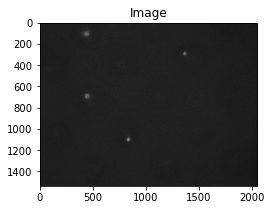

In [15]:
print_img(img)

## Day 11

In [8]:
sample_spheroid = bf_path + "scan_Plate_R_p11_0_B01f00d4.TIF"
sample_sensor = tr_path + "scan_Plate_R_p11_0_B01f00d3.TIF"

### Spheroid

All units in um (0.638 pixels/um)

Circle #1:
 center (x,y): (793.5678129285855, 2146.9910241967086)
 area: 151958.28465537936
Circle #2:
 center (x,y): (1833.5739661907328, 2107.309562659189)
 area: 179214.01168849057
Circle #3:
 center (x,y): (2863.033474052214, 2062.703004077684)
 area: 155663.4507219422
Circle #4:
 center (x,y): (252.5097120518221, 1685.1835340541732)
 area: 161819.42220833263
Circle #5:
 center (x,y): (1256.4064910793006, 1650.732728007445)
 area: 116840.37069354777
Circle #6:
 center (x,y): (2300.9404388714734, 1606.5830721003135)
 area: 186754.30893067966
Circle #7:
 center (x,y): (752.3623379794034, 1184.311821916634)
 area: 133843.10736057337
Circle #8:
 center (x,y): (2808.6544024906934, 1061.3319133890086)
 area: 169080.61697307805
Circle #9:
 center (x,y): (1756.497661148119, 1088.3308817226684)
 area: 192448.24442356927
Circle #10:
 center (x,y): (1228.021125434708, 618.1936712474285)
 area: 172861.72901098718
Circle #11:
 center (x,y): (2238.826931083464,

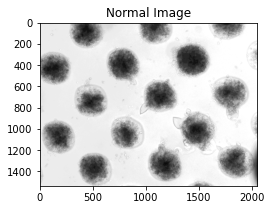

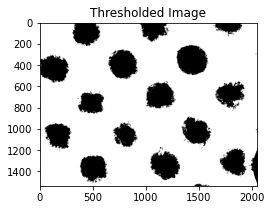

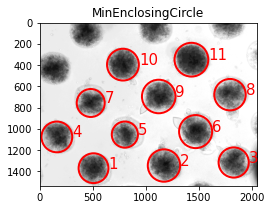

In [9]:
threshold = 150
radius_range = (40, 500)


img = sample_spheroid
img = preprocess_img(img)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

print_img(img, "Normal Image")
print_img(thresh, "Thresholded Image")

# Retrieval modes and contour approximation types found on OpenCV docs
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

contours = [] # New contour array that only has significant contours
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)    

circle_coords = []
for contour in contours:
    (x, y), r = cv2.minEnclosingCircle(contour)
    if r > radius_range[1]:
        continue
    circle_coords.append((x, y, r))
    
verbose = True

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("MinEnclosingCircle")
ax.imshow(img, cmap=plt.cm.gray)

print("All units in um ({} pixels/um)\n".format(scale))
for idx, circle in enumerate(circle_coords):
    x, y, r = circle[0], circle[1], circle[2]
    c = plt.Circle((x, y), r, color="red", linewidth=2, fill=False)
    
    if verbose:
        ax.text(x + r, y, str(idx+1), color='red', fontsize=15)
        
        scale = 0.638
        x, y, r = x/scale, y/scale, r/scale
        print("Circle #{}:\n center (x,y): ({}, {})\n area: {}".format(idx+1,x,y,np.pi*r**2))
        
    ax.add_patch(c)

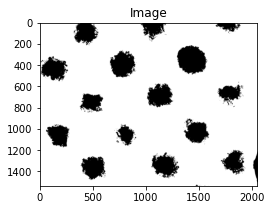

In [10]:
threshold = 120
radius_range = (40, 500)


img = sample_spheroid
img = preprocess_img(img)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)
print_img(thresh)

### Sensor -- Ellipse

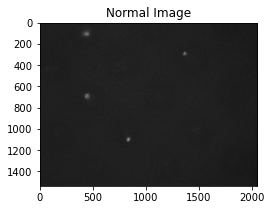

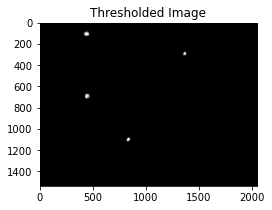

In [11]:
threshold = 70

img = preprocess_img(sample_sensor)

_, thresh = cv2.threshold(img, threshold, np.max(img), cv2.THRESH_BINARY)

print_img(img, "Normal Image")
print_img(thresh, "Thresholded Image")

In [12]:
raw_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_NONE)

In [13]:
# Sensors
radius_range = (10, 500)

contours = []
for contour in raw_contours:
    # Most items in raw contours are lines or small shapes
    if cv2.contourArea(contour) < (np.pi * radius_range[0] ** 2):
        continue
    contours.append(contour)

ellipse_coords = []
for contour in contours:
    (x,y),(w,h),ang = cv2.fitEllipse(contour)
    if max(w,h) > radius_range[1]:
        continue
    ellipse_coords.append(((x,y),(w,h),ang))

Ellipse #1:
 center (x,y): (1300.2433178940537, 1722.9080439361285)
 area: 1874.097628443992, major: 58.44079140211721, minor: 40.83064506793844, angle: 53.78084945678711
Ellipse #2:
 center (x,y): (694.8446435240743, 1087.0861663340027)
 area: 3286.7282911033626, major: 66.02843951282082, minor: 63.378635992450775, angle: 70.3284797668457
Ellipse #3:
 center (x,y): (2131.0380798148512, 464.1031486487314)
 area: 1582.9137913683985, major: 49.12789861984014, minor: 41.02411240245855, angle: 63.95681953430176
Ellipse #4:
 center (x,y): (685.0166918715713, 173.47305919683092)
 area: 3338.8760768446696, major: 71.43448139059133, minor: 59.511722815821535, angle: 8.372222900390625


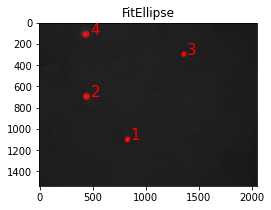

In [26]:
verbose = True

fig, ax = plt.subplots(figsize=(9, 3))

ax.set_title("FitEllipse")
ax.imshow(img, cmap=plt.cm.gray)

for idx, ellipse in enumerate(ellipse_coords):
    (x,y), (w,h), ang = ellipse
    
    e = Ellipse((x,y), w, h, ang, color="red", linewidth=2, fill=False)
    
    if verbose: 
        ax.text(x + w, y, str(idx+1), color='red', fontsize=15)
        
        scale = 0.638
        x, y, w, h = x/scale, y/scale, w/scale, h/scale
        
        # OpenCV to ImageJ Angle Conversion
        if ang > 90:
            ang = 270 - ang
        else:
            ang = 90 - ang
        
        area = w * h * np.pi / 4
        print("Ellipse #{}:\n center (x,y): ({}, {})\n area: {}, major: {}, minor: {}, angle: {}".format(idx+1,x,y,area,max(w,h),min(w,h),ang))
        
    ax.add_patch(e)

In [17]:
import os

<generator object walk at 0x000001EE517F44A0>

In [51]:
path = "C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/EGFP_1mm/BF/"

dirs = [dir_[0] for dir_ in os.walk(path)][1:]
dir_hr = [dir_.split("/")[-1] for dir_ in dirs]

In [52]:
dirs

['C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/EGFP_1mm/BF',
 'C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/EGFP_1mm/GFP',
 'C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/EGFP_1mm/Merged',
 'C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/EGFP_1mm/Texas Red']

In [ ]:
from os import listdir
from os.path import isfile, join

[f for f in listdir(path) if isfile(join(path, f))]

In [106]:
bf_folder = "C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/EGFP_1mm/BF/"
tr_folder = "C:/Users/Rahul Behal/Documents/494/Data/88hr timelapse/EGFP_1mm/Texas Red/"

VALID_FORMAT = ('.BMP', '.GIF', '.JPG', '.JPEG', '.PNG', '.PBM', '.PGM', '.PPM', '.TIFF', '.TIF', '.XBM')  # Image formats supported by Qt
id_pattern = "(p\d{1,4})" # Image id example: 'scan_Plate_R_{p03}_0_A02f00d4.TIF',

''' Get the names and paths of all the images in a directory. '''
bf_image_list = []
tr_image_list = []

if os.path.isdir(bf_folder):
    for file in os.listdir(bf_folder):
        if file.upper().endswith(VALID_FORMAT):
            im_path = os.path.join(bf_folder, file)

            match = re.search(id_pattern, file)
            id_ = match.group()            
            
            image_obj = {'name': file, 'path': im_path, 'type': "BF", 'id': id_}
            bf_image_list.append(image_obj)
            
if os.path.isdir(tr_folder):
    for file in os.listdir(tr_folder):
        if file.upper().endswith(VALID_FORMAT):
            im_path = os.path.join(tr_folder, file)

            match = re.search(id_pattern, file)
            id_ = match.group()            
            
            image_obj = {'name': file, 'path': im_path, 'type': "TF", 'id': id_}
            tr_image_list.append(image_obj)      